In [1]:
import pandas as pd
df = pd.read_csv('insurance.csv', encoding='utf-8')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
def one_hot_encoding(input : list) -> (list, dict):
    uniques = set(input)
    mapping = {value:index for index,value in enumerate(uniques)}
    return [mapping[item] for item in input], mapping

df.sex, sex_map = one_hot_encoding(df.sex)
df.smoker, smoker_map = one_hot_encoding(df.smoker)
df.region, region_map = one_hot_encoding(df.region)
df = df.sample(frac=1)
display(df)

,age,sex,bmi,children,smoker,region,charges
16,52,1,30.780,1,1,3,10797.33620
543,54,1,47.410,0,0,0,63770.42801
1127,35,1,35.860,2,1,0,5836.52040
816,24,1,24.225,0,1,2,2842.76075
314,27,1,31.400,0,0,1,34838.87300
...,...,...,...,...,...,...,...
597,34,1,33.250,1,1,3,5594.84550
328,64,1,33.800,1,0,1,47928.03000
1173,38,0,29.260,2,1,2,6457.84340
960,19,1,39.615,1,1,2,2730.10785


In [3]:
training_set = df[:1100]
test_set = df[1100:]

x_train = training_set[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].to_numpy()
x_test = test_set[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].to_numpy()

y_train = training_set[['charges']].to_numpy()
y_test = test_set[['charges']].to_numpy()

display(x_test)
display(y_test)

array([[39.   ,  0.   , 32.34 ,  2.   ,  1.   ,  0.   ],
       [39.   ,  1.   , 32.8  ,  0.   ,  1.   ,  1.   ],
       [43.   ,  1.   , 32.56 ,  3.   ,  0.   ,  0.   ],
       ...,
       [38.   ,  0.   , 29.26 ,  2.   ,  1.   ,  2.   ],
       [19.   ,  1.   , 39.615,  1.   ,  1.   ,  2.   ],
       [21.   ,  1.   , 33.63 ,  2.   ,  1.   ,  2.   ]])

array([[ 6338.0756 ],
       [ 5649.715  ],
       [40941.2854 ],
       [40182.246  ],
       [ 2803.69785],
       [ 8765.249  ],
       [ 9549.5651 ],
       [38344.566  ],
       [ 9283.562  ],
       [ 2721.3208 ],
       [ 5031.26955],
       [ 1759.338  ],
       [ 7421.19455],
       [ 8520.026  ],
       [ 2464.6188 ],
       [ 6474.013  ],
       [ 5354.07465],
       [ 2755.02095],
       [ 6571.02435],
       [37270.1512 ],
       [ 2254.7967 ],
       [ 4618.0799 ],
       [21195.818  ],
       [ 2020.177  ],
       [26236.57997],
       [ 7261.741  ],
       [44260.7499 ],
       [ 9910.35985],
       [ 5425.02335],
       [10564.8845 ],
       [ 9880.068  ],
       [15817.9857 ],
       [ 5969.723  ],
       [ 4058.1161 ],
       [10422.91665],
       [ 5148.5526 ],
       [ 8027.968  ],
       [14254.6082 ],
       [ 8556.907  ],
       [16577.7795 ],
       [11455.28   ],
       [11289.10925],
       [ 8527.532  ],
       [26018.95052],
       [44202.6536 ],
       [ 4

In [4]:
from keras import models
from keras import layers

model = models.Sequential(name='feedforward')
model.add(layers.Input(shape=(None, 6), name='input'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=1, name='output'))
model.summary()

2024-06-14 21:58:40.581627: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 21:58:40.606628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 21:58:40.606643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 21:58:40.607616: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 21:58:40.611967: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 21:58:40.612588: I tensorflow/core/platform/cpu_feature_guard.cc:1

Model: "feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 64)          448       
                                                                 
 dense_1 (Dense)             (None, None, 32)          2080      
                                                                 
 output (Dense)              (None, None, 1)           33        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(optimizer="rmsprop", loss="mae")
history = model.fit(x_train, y_train, batch_size=64, epochs=500, validation_data=[x_test, y_test])

Epoch 1/500
18/18 [==============================] - 0s 6ms/step - loss: 13496.9229 - val_loss: 12094.2666
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 13473.1758 - val_loss: 12068.9316
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 13444.7324 - val_loss: 12035.9766
Epoch 4/500
18/18 [==============================] - 0s 1ms/step - loss: 13407.4541 - val_loss: 11992.9824
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 13359.7588 - val_loss: 11939.5254
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 13301.4277 - val_loss: 11874.6465
Epoch 7/500
18/18 [==============================] - 0s 1ms/step - loss: 13231.1309 - val_loss: 11797.3008
Epoch 8/500
18/18 [==============================] - 0s 1ms/step - loss: 13148.1631 - val_loss: 11707.3789
Epoch 9/500
18/18 [==============================] - 0s 1ms/step - loss: 13051.7520 - val_loss: 11602.6553
Epoch 10/500
18/18 [=================

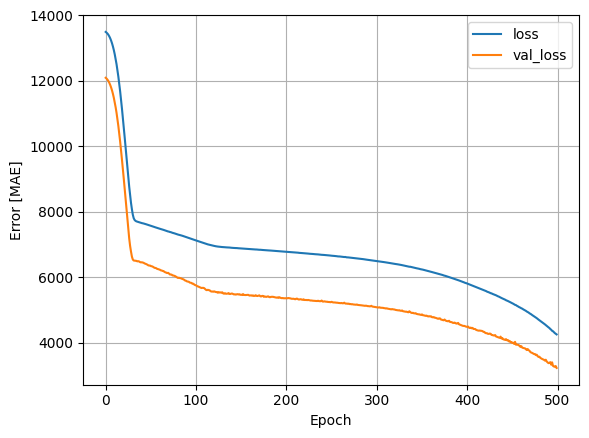

In [6]:
from matplotlib import pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MAE]')
  plt.legend()
  plt.grid(True)
  
plot_loss(history)

Model: "feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, None, 128)         896       
                                                                 
 dense_3 (Dense)             (None, None, 64)          8256      
                                                                 
 dense_4 (Dense)             (None, None, 32)          2080      
                                                                 
 output (Dense)              (None, None, 1)           33        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
18/18 [==============================] - 0s 5ms/step - loss: 13498.5186 - val_loss: 12073.3438
Epoch 2/500
18/18 [=========================

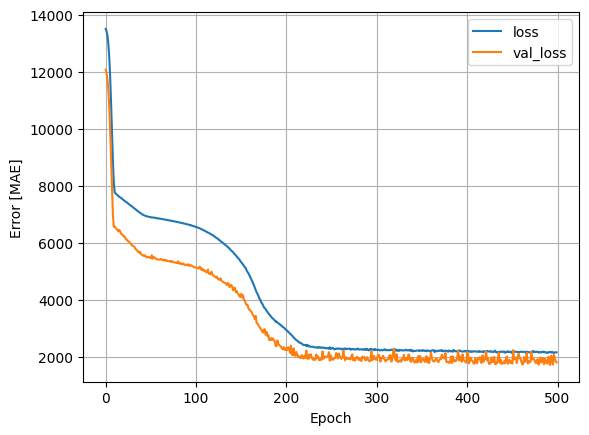

In [7]:
model = models.Sequential(name='feedforward')
model.add(layers.Input(shape=(None, 6), name='input'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=1, name='output'))
model.summary()

model.compile(optimizer="rmsprop", loss="mae")
history = model.fit(x_train, y_train, batch_size=64, epochs=500, validation_data=[x_test, y_test])

plot_loss(history)

In [8]:
import numpy as np
#age,sex,bmi,children,smoker,region
INPUT = [30, 'male', 22, 0, 'no', 'northwest']

def inference(input : list):
    input[1] = sex_map[input[1]] #converting sex
    input[4] = smoker_map[input[4]] #converting smoker
    input[5] = region_map[input[5]] #converting region
    nparray = np.array([input], dtype=np.int32)
    pred = model.predict(nparray, verbose=0)
    return pred

print(f"Input: {INPUT}")
print(f"Output: {inference(INPUT)[0][0]}")


Input: [30, 'male', 22, 0, 'no', 'northwest']
Output: 3563.525634765625
